# Problem Statement

CNBE, a prominent news channel, is gearing up to provide insightful coverage of recent elections, recognizing the importance of data-driven analysis. A comprehensive survey has been conducted, capturing the perspectives of 1525 voters across various demographic and socio-economic factors. This dataset encompasses 9 variables, offering a rich source of information regarding voters' characteristics and preferences.

The objective is to build a predictive model for forecasting which political party (Conservative or Labour) a voter is likely to support, based on demographic and socio-economic factors. The dataset includes variables such as age, economic conditions, leadership assessment, attitudes toward European integration, political knowledge, and gender.

**vote**: Party choice: Conservative or Labour.

**age**: in years.

**economic.cond.national**: Assessment of current national economic conditions, 1 to 5.

**economic.cond.household**: Assessment of current household economic conditions, 1 to 5.

**Blair**: Assessment of the Labour leader, 1 to 5.

**Hague**: Assessment of the Conservative leader, 1 to 5.

**Europe**: an 11-point scale that measures respondents' attitudes toward European integration.   High scores represent ‘Eurosceptic’ sentiment.

**political.knowledge**: Knowledge of parties' positions on European integration, 0 to 3.
gender: female or male.

### Upload Required Libraries

In [1]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style

import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import roc_auc_score

### Importing data

In [2]:
df=pd.read_excel('Election_Data.xlsx',sheet_name='Election_Dataset_Two Classes')

## Exploratory Data Analysis (EDA)

In [3]:
df.head()

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male


### Check shape

In [4]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  1525 
no. of columns:  10


### Data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               1525 non-null   int64 
 1   vote                     1525 non-null   object
 2   age                      1525 non-null   int64 
 3   economic.cond.national   1525 non-null   int64 
 4   economic.cond.household  1525 non-null   int64 
 5   Blair                    1525 non-null   int64 
 6   Hague                    1525 non-null   int64 
 7   Europe                   1525 non-null   int64 
 8   political.knowledge      1525 non-null   int64 
 9   gender                   1525 non-null   object
dtypes: int64(8), object(2)
memory usage: 119.3+ KB


**Total of 2 Object type and 8 Integer Type of variables are present under the dataframe.**

### Statistical summary

In [6]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1525.0,NaN,NaN,NaN,763.0,440.373894,1.0,382.0,763.0,1144.0,1525.0
vote,1525,2,Labour,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1525.0,NaN,NaN,NaN,54.182295,15.711209,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1525.0,NaN,NaN,NaN,3.245902,0.880969,1.0,3.0,3.0,4.0,5.0
economic.cond.household,1525.0,NaN,NaN,NaN,3.140328,0.929951,1.0,3.0,3.0,4.0,5.0
Blair,1525.0,NaN,NaN,NaN,3.334426,1.174824,1.0,2.0,4.0,4.0,5.0
Hague,1525.0,NaN,NaN,NaN,2.746885,1.230703,1.0,2.0,2.0,4.0,5.0
Europe,1525.0,NaN,NaN,NaN,6.728525,3.297538,1.0,4.0,6.0,10.0,11.0
political.knowledge,1525.0,NaN,NaN,NaN,1.542295,1.083315,0.0,0.0,2.0,2.0,3.0
gender,1525,2,female,812,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Most of the  voters are for Labour party and are females**

**Average age of the voter is 54 years**

**From an initial view, no missing values are seen**

**First column contains index so we can remove that**

In [7]:
df.drop(df.columns[0],axis=1,inplace=True)

In [8]:
df

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


### Univariate analysis

In [9]:
cat=[]
num=[]
for column in df.columns:
    if df[column].dtype=='object':
        cat.append(column)
    else:
        num.append(column)
        

#### Categorical values

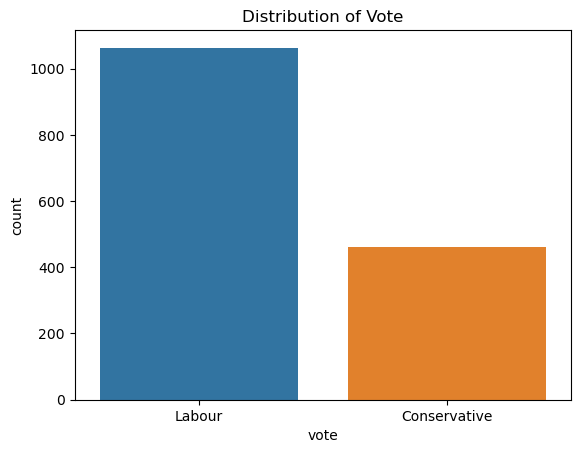

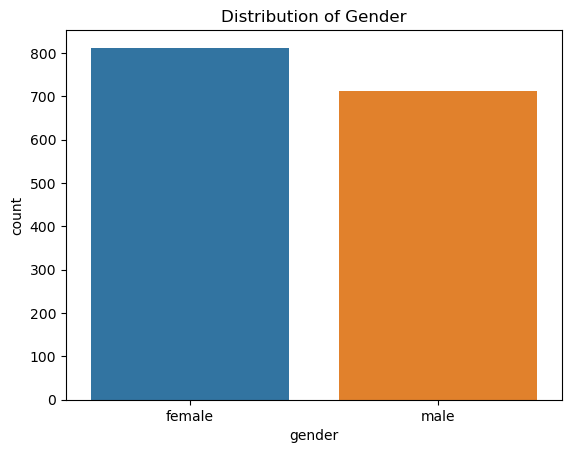

In [10]:
for i in cat:
    sns.countplot(x=df[i],data=df)
    plt.title(f'Distribution of {i.capitalize()}')
    plt.show()

**Female voters are more than Male**

**The number of voters belonging to Labour party is almost double the number of voters for conservative party**

**When one feature has a larger range of values, it might dominate the learning process. In this case, the Labour votes (being double the Conservative votes) might overshadow the influence of the Conservative votes. This can lead to issues where the model learns more about the feature with the larger scale and less about the other.**

**Models may place more importance on the predictor with the larger values.**

**When using models that are sensitive to feature scales (like distance-based models), not addressing this imbalance can lead to poor model performance or misinterpretation of feature importance.**

In [11]:
for i in cat:
    print(df[i].value_counts().reset_index(),'\n')

           vote  count
0        Labour   1063
1  Conservative    462 

   gender  count
0  female    812
1    male    713 



#### Numerical values

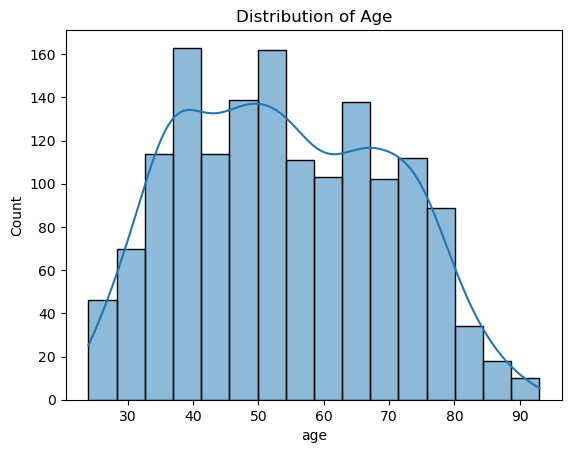

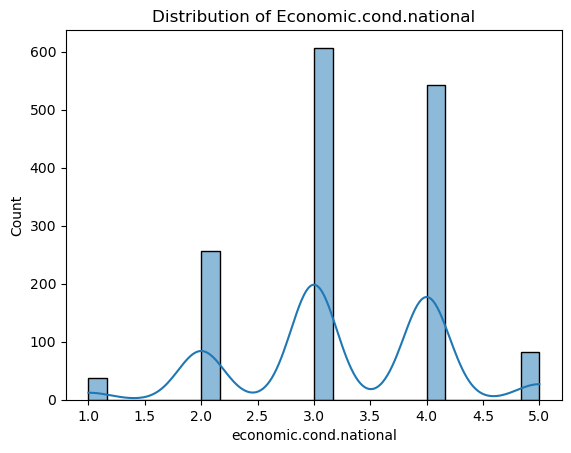

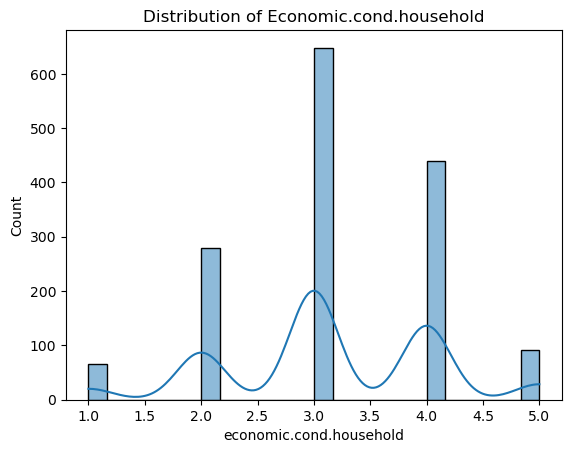

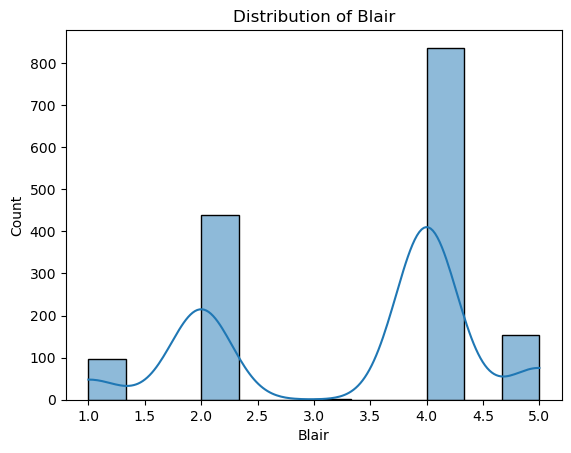

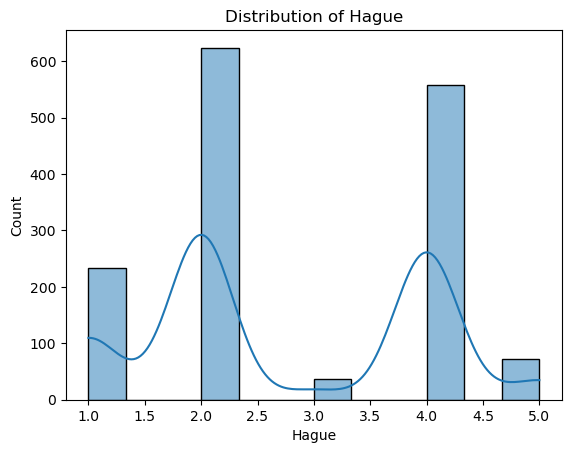

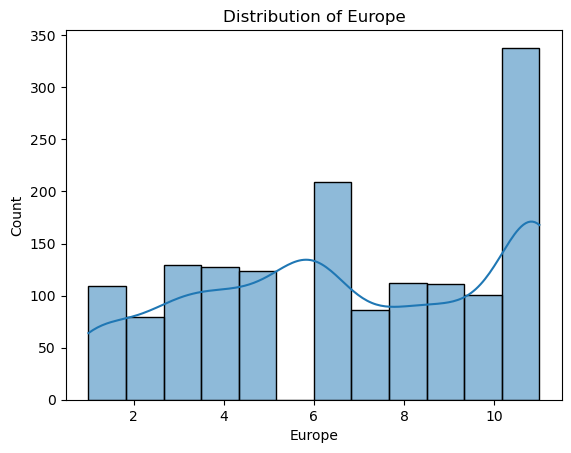

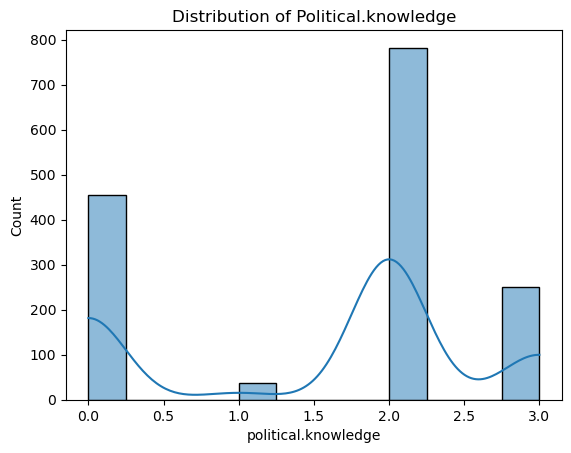

In [12]:
for col in num:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col.capitalize()}')
    plt.show()

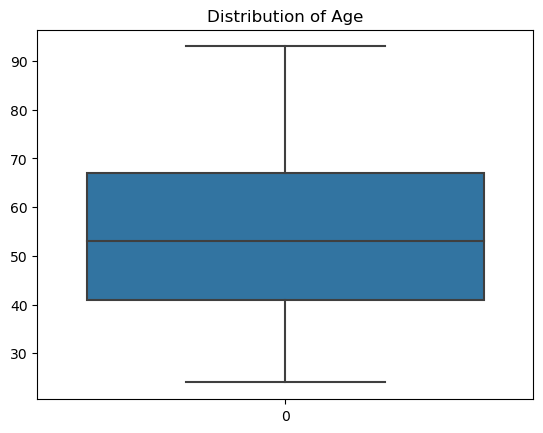

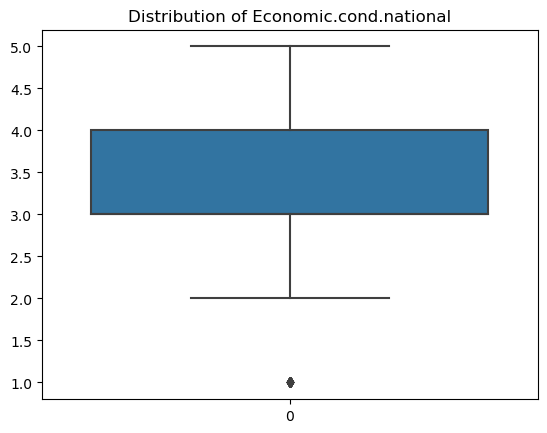

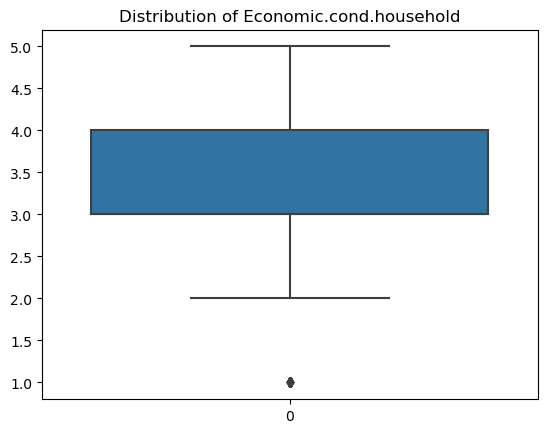

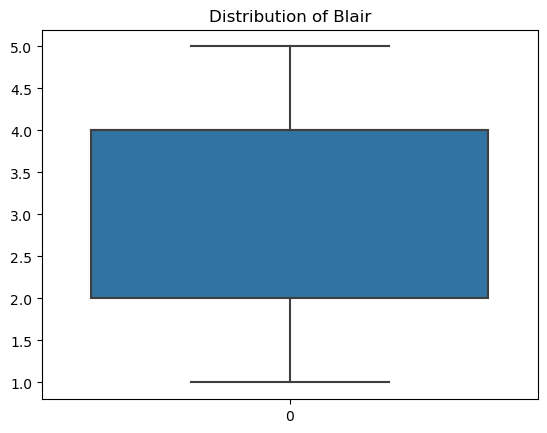

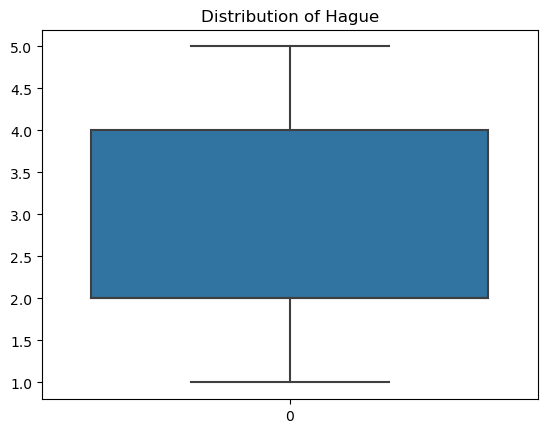

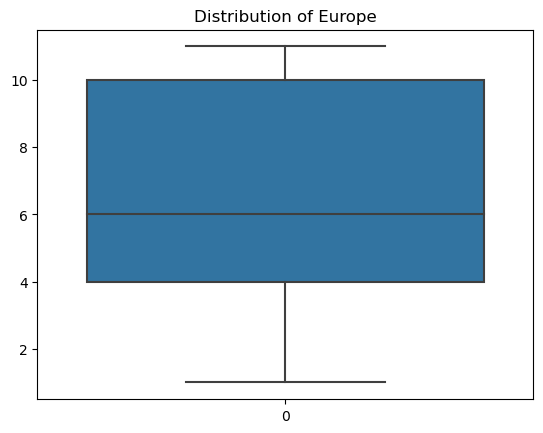

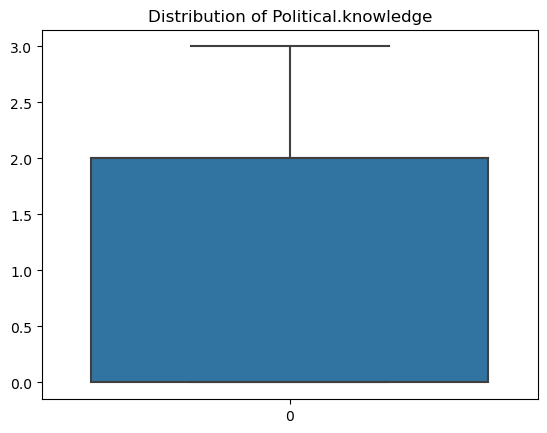

In [13]:
for col in num:
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col.capitalize()}')
    plt.show()

### Multivariate analysis

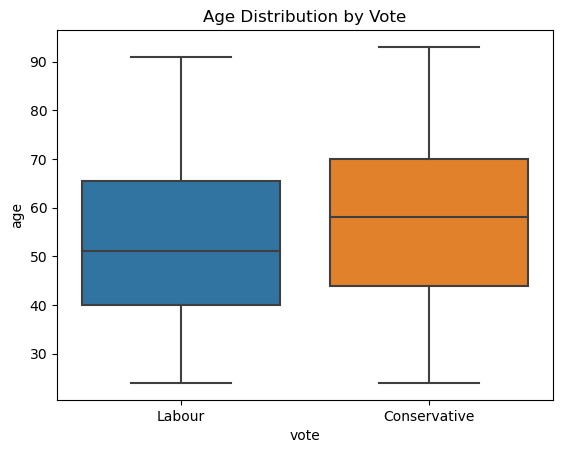

In [14]:
sns.boxplot(x='vote', y='age', data=df)
plt.title('Age Distribution by Vote')
plt.show()

In [15]:
age_summary = df.groupby('vote')['age'].describe()

print("Age Summary by Vote:")
print(age_summary)

Age Summary by Vote:
               count       mean        std   min   25%   50%   75%   max
vote                                                                    
Conservative   462.0  56.870130  15.605787  24.0  44.0  58.0  70.0  93.0
Labour        1063.0  53.014111  15.620463  24.0  40.0  51.0  65.5  91.0


**Conservative voters might be older than Labour voters looking from the mean and median age.**

**Both groups have similar age ranges, with the youngest being 24 years old and the oldest being 93 years old.**

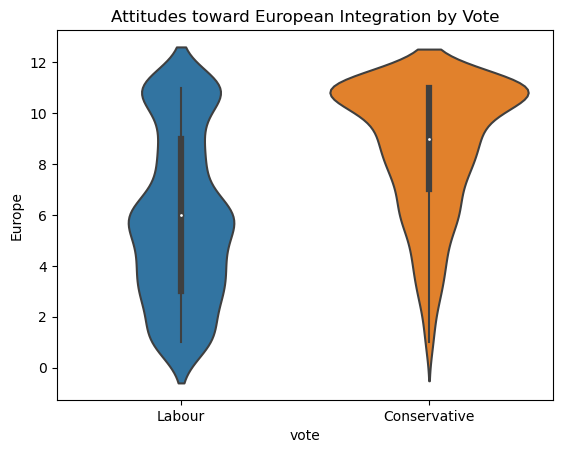

In [16]:
sns.violinplot(x='vote', y='Europe', data=df)
plt.title('Attitudes toward European Integration by Vote')
plt.show()

In [17]:
europe_summary = df.groupby('vote')['Europe'].describe()

print("\nEurope Summary by Vote:")
print(europe_summary)


Europe Summary by Vote:
               count      mean       std  min  25%  50%   75%   max
vote                                                               
Conservative   462.0  8.655844  2.583226  1.0  7.0  9.0  11.0  11.0
Labour        1063.0  5.890875  3.223230  1.0  3.0  6.0   9.0  11.0


**Conservative voters are generally more Eurosceptic, reflecting more negative attitudes towards European integration.**

**As standard deviation is higher for Labour voters, it suggests that they have more diversity in opinion regarding European integration.**

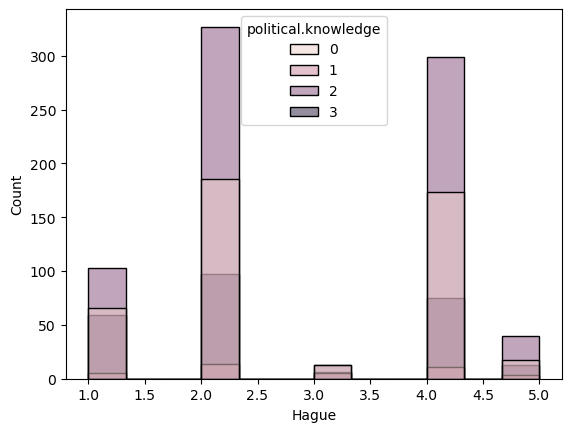

In [18]:
sns.histplot(data=df , x = "Hague", hue = "political.knowledge")
plt.show()

In [19]:
pd.crosstab(df['political.knowledge'], df['Hague'])

Hague,1,2,3,4,5
political.knowledge,,,,,
0,66,186,13,173,17
1,5,14,5,11,3
2,103,327,13,299,40
3,59,97,6,75,13


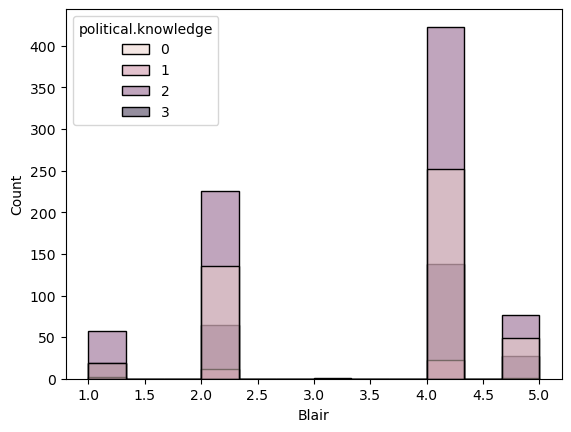

In [20]:
sns.histplot(data=df , x = "Blair", hue = "political.knowledge")
plt.show()

In [21]:
pd.crosstab(df['political.knowledge'], df['Blair'])

Blair,1,2,3,4,5
political.knowledge,,,,,
0,19,135,0,252,49
1,2,12,0,23,1
2,57,226,0,423,76
3,19,65,1,138,27


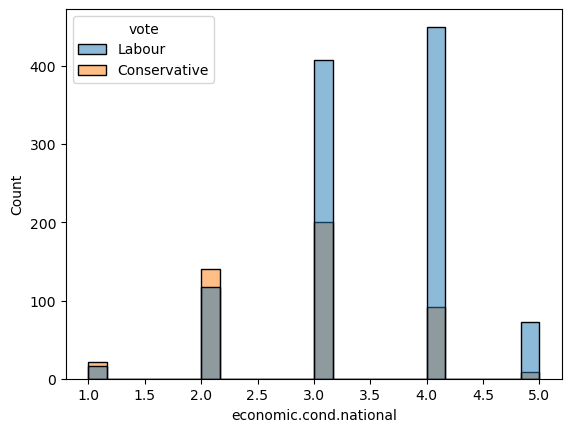

In [22]:
sns.histplot(data=df , x = "economic.cond.national", hue = "vote")
plt.show()

In [23]:
pd.crosstab(df['vote'], df['economic.cond.national'])

economic.cond.national,1,2,3,4,5
vote,,,,,
Conservative,21,140,200,92,9
Labour,16,117,407,450,73


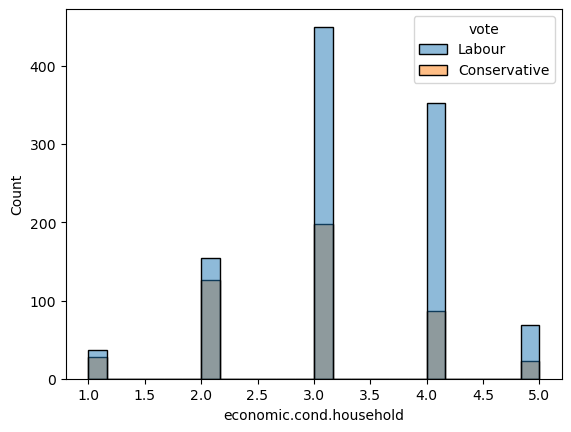

In [24]:
sns.histplot(data=df , x = "economic.cond.household", hue = "vote")
plt.show()

In [25]:
pd.crosstab(df['vote'], df['economic.cond.household'])

economic.cond.household,1,2,3,4,5
vote,,,,,
Conservative,28,126,198,87,23
Labour,37,154,450,353,69


**Labour voters tend to rate the national economic conditions more positively compared to Conservative voters.**

**Labour voters rate their household economic conditions more positively than Conservative voters.**

**This could be because of the difference in data collected between voters who prefer Labour Party over Conservative**

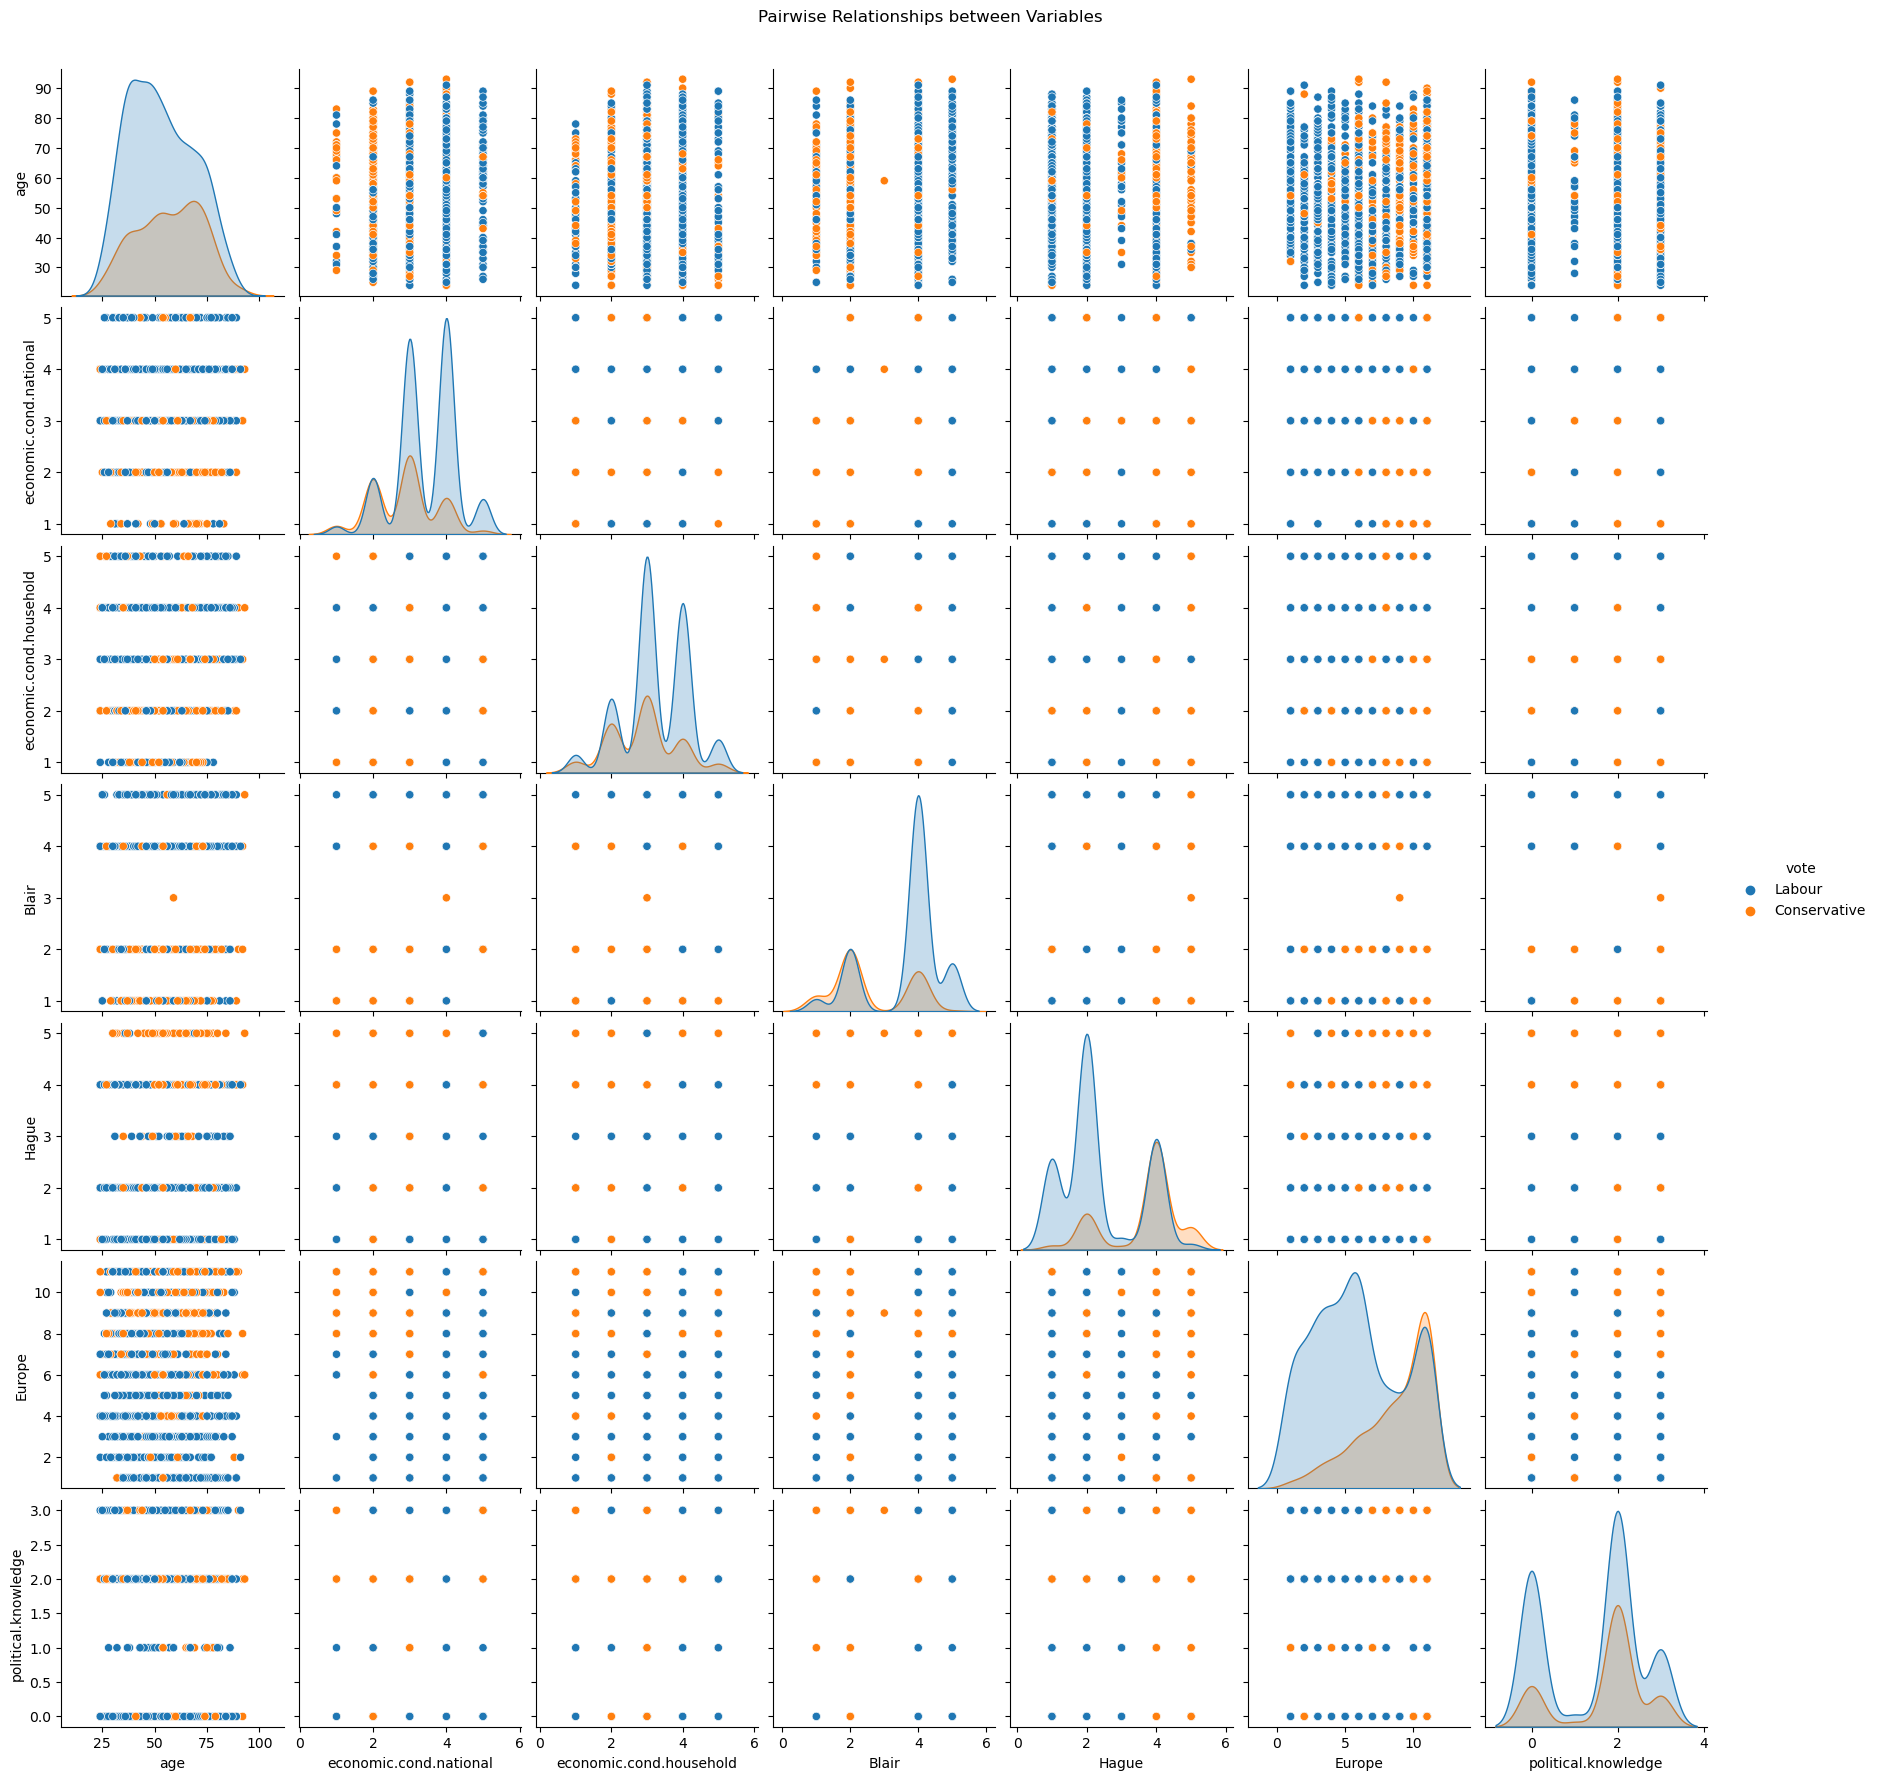

In [26]:
sns.pairplot(df, hue='vote')
plt.suptitle('Pairwise Relationships between Variables', y=1.02)
plt.show()

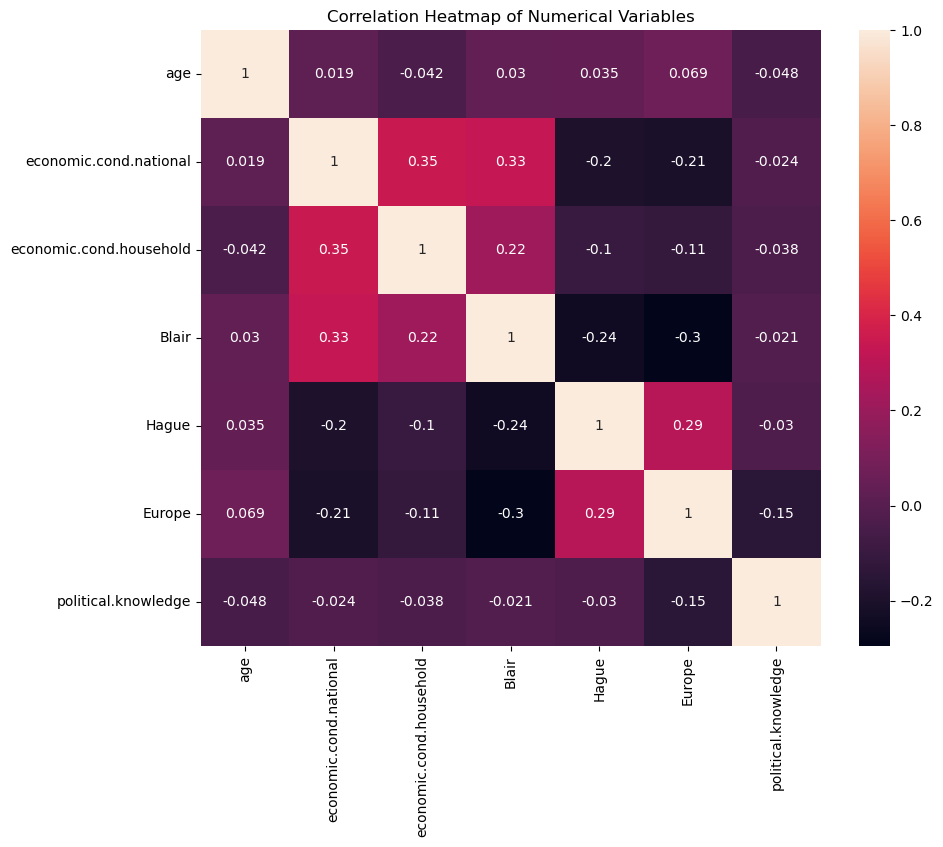

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[num].corr(), annot=True)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

In [28]:
df[num].corr()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
age,1.000000,0.018567,-0.041587,0.030218,0.034626,0.068880,-0.048490
economic.cond.national,0.018567,1.000000,0.346303,0.326878,-0.199766,-0.209429,-0.023624
economic.cond.household,-0.041587,0.346303,1.000000,0.215273,-0.101956,-0.114885,-0.037810
Blair,0.030218,0.326878,0.215273,1.000000,-0.243210,-0.296162,-0.020917
Hague,0.034626,-0.199766,-0.101956,-0.243210,1.000000,0.287350,-0.030354
Europe,0.068880,-0.209429,-0.114885,-0.296162,0.287350,1.000000,-0.152364
political.knowledge,-0.048490,-0.023624,-0.037810,-0.020917,-0.030354,-0.152364,1.000000


**There are no extremely strong correlations**

## Data Pre-processing

### Outlier Detection

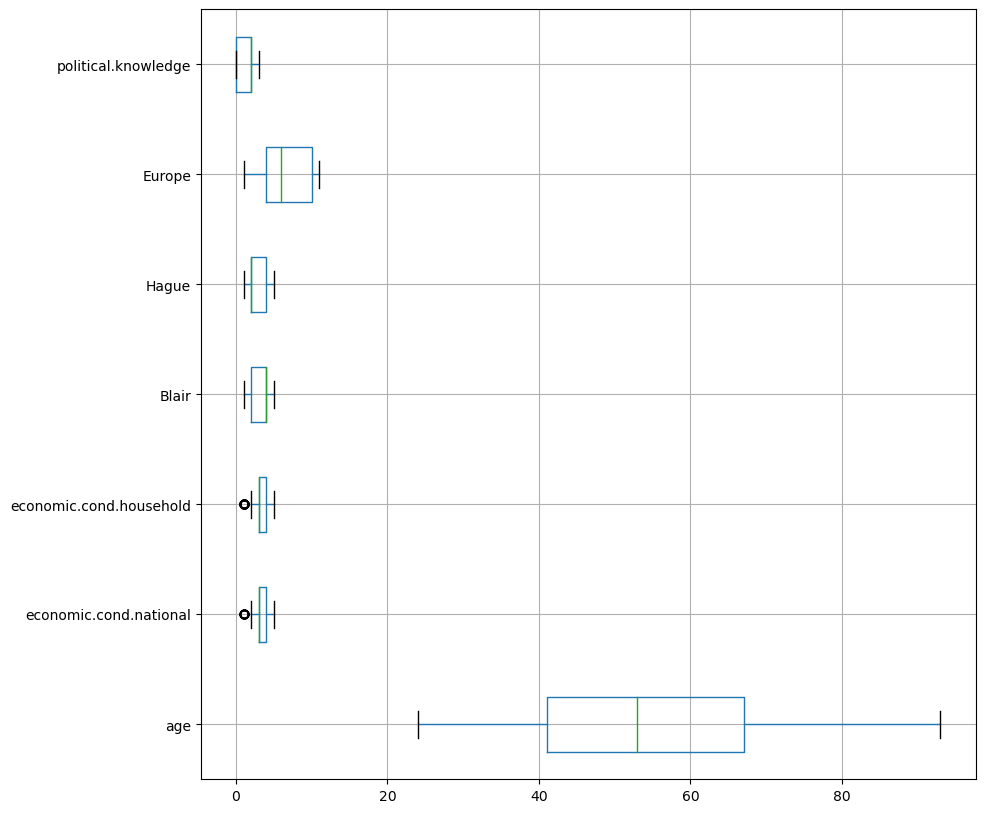

In [29]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,1:8].boxplot(vert=0)
plt.show()

**Outliers are found for economic.cond.national and economic.cond.household**

### Outlier treatment

In [30]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [31]:
for column in df.iloc[:, 1:8].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

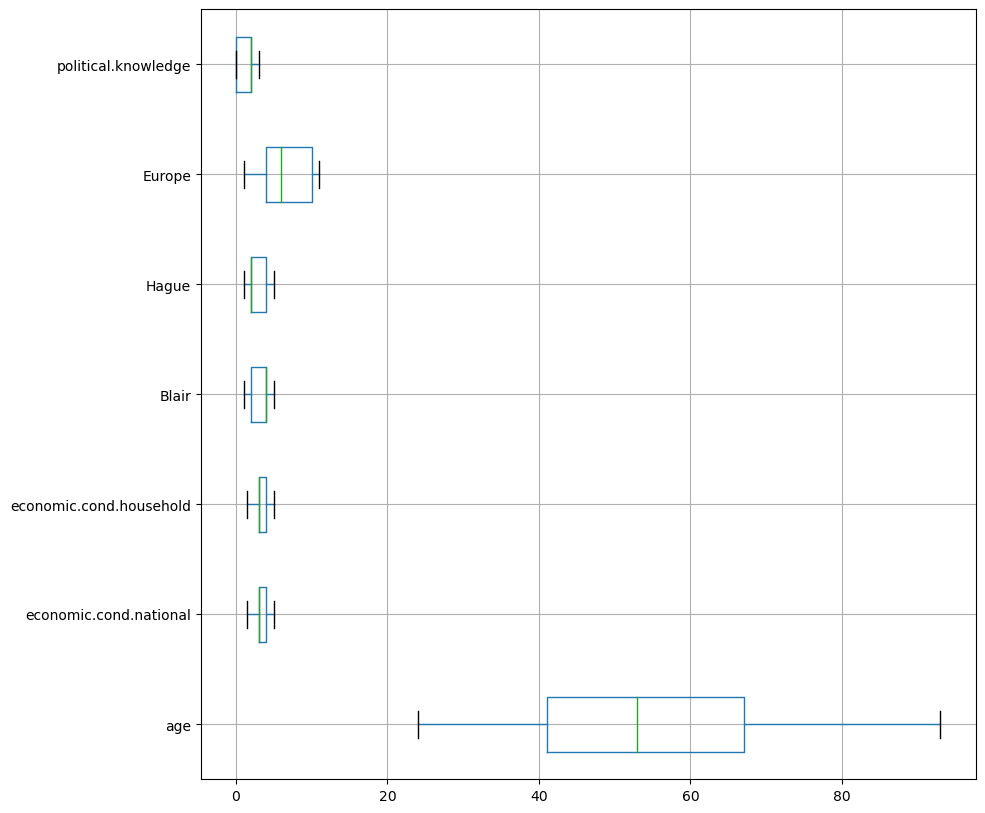

In [32]:
# construct box plot for continuous variables
plt.figure(figsize=(10,10))
df.iloc[:,1:8].boxplot(vert=0)
plt.show()

### Encode the data

In [33]:
cat = ['gender','vote']

In [34]:
df_encoded =pd.get_dummies(df, columns=cat,dtype='int8',drop_first=True)

In [35]:
df_encoded.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,43.0,3.0,3.0,4.0,1.0,2.0,2.0,0,1
1,36.0,4.0,4.0,4.0,4.0,5.0,2.0,1,1
2,35.0,4.0,4.0,5.0,2.0,3.0,2.0,1,1
3,24.0,4.0,2.0,2.0,1.0,4.0,0.0,0,1
4,41.0,2.0,2.0,1.0,1.0,6.0,2.0,1,1


### Scale the data

**scaling is important for algorithms that rely on distance measurements or that are sensitive to the scale of features, while its impact is less critical for algorithms that are not affected by the scale of the features.**

In [36]:
print(num)

['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']


In [37]:
df_encoded[num] = df_encoded[num].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

**We are using using min-max technique**

In [38]:
df_encoded.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0,1
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1,1
2,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0,1
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1,1


### Data split

In [39]:
df_encoded.columns

Index(['age', 'economic.cond.national', 'economic.cond.household', 'Blair',
       'Hague', 'Europe', 'political.knowledge', 'gender_male', 'vote_Labour'],
      dtype='object')

In [40]:
# Copy all the predictor variables into X dataframe
X = df_encoded.drop('vote_Labour', axis=1)

# Copy target into the y dataframe.  
y = df_encoded['vote_Labour']

In [41]:
X.head()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1
2,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1


In [42]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: vote_Labour, dtype: int8

In [43]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

## Model Building

### Metrics of Choice

**Using accuracy, precision, recall, F1 score, and ROC-AUC for classification**

**Accuracy provides a straightforward assessment of how well the model is performing overall.**

**Precision and Recall: Useful if you need to evaluate performance for specific classes or imbalanced data.**

**Balances precision and recall, especially for imbalanced datasets.**

**ROC-AUC evaluates how well the model separates classes across different thresholds.**


## Logistic Regression

In [44]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression()
Log_model.fit(X_train, y_train)

LogisticRegression()

In [45]:
print("Accuracy of Logistic Regression Model (train): ",Log_model.score(X_train, y_train))

Accuracy of Logistic Regression Model (train):  0.8398950131233596


In [46]:
print("Accuracy of Logistic Regression Model (test): ",Log_model.score(X_test, y_test))

Accuracy of Logistic Regression Model (test):  0.819371727748691


In [47]:
## Performance Matrix on train data set
from sklearn import metrics
y_train_predict = Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train, y_train_predict))

Model Score train data: 0.8398950131233596 

confusion matrix train data:
 [[238 113]
 [ 70 722]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       351
           1       0.86      0.91      0.89       792

    accuracy                           0.84      1143
   macro avg       0.82      0.79      0.80      1143
weighted avg       0.84      0.84      0.84      1143



In [48]:
## Performance Matrix on test data set
y_test_predict = Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.819371727748691 

confusion matrix test data:
 [[ 74  37]
 [ 32 239]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.70      0.67      0.68       111
           1       0.87      0.88      0.87       271

    accuracy                           0.82       382
   macro avg       0.78      0.77      0.78       382
weighted avg       0.82      0.82      0.82       382



### AUC and ROC for the training data

AUC: 0.889


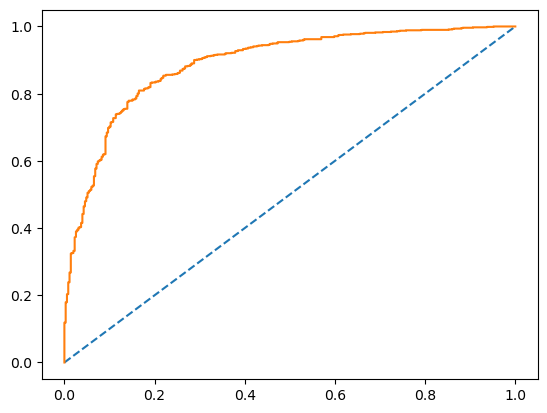

In [49]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
# predict probabilities
probs = Log_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.889


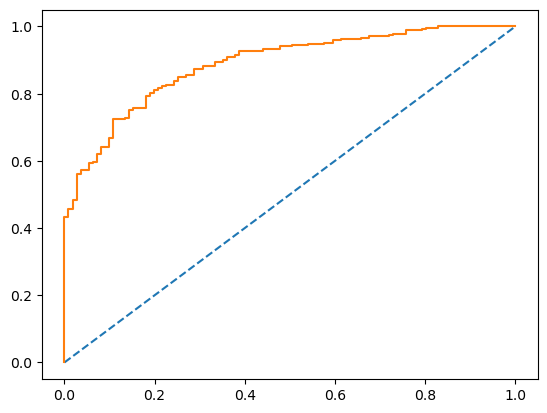

In [50]:
# predict probabilities
probs = Log_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

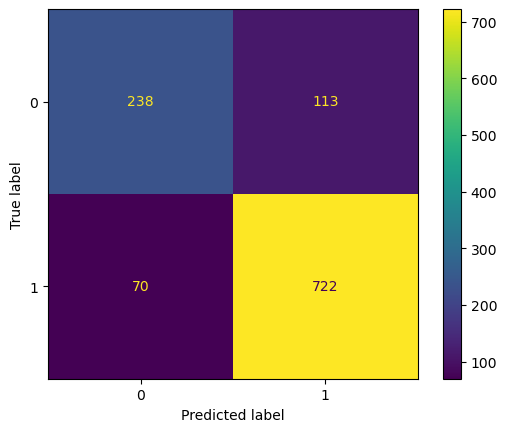

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay.from_estimator(Log_model, X_train, y_train)

# To display the plot
plt.show()

### Confusion Matrix for test data

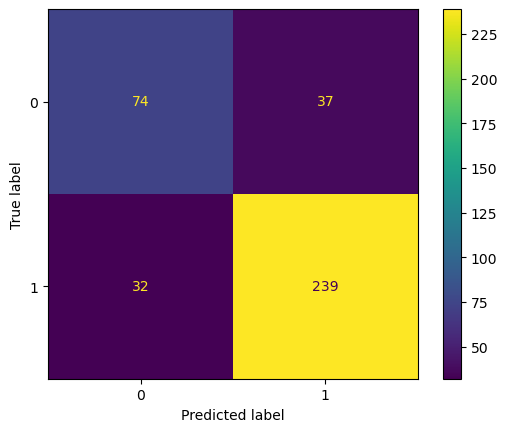

In [52]:
disp = ConfusionMatrixDisplay.from_estimator(Log_model, X_test, y_test)

# To display the plot
plt.show()

### KNN Model

In [53]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)

KNeighborsClassifier()

In [54]:
print("Accuracy of Logistic Regression Model (train): ",KNN_model.score(X_train, y_train))

Accuracy of Logistic Regression Model (train):  0.8670166229221348


In [55]:
print("Accuracy of Logistic Regression Model (test): ",KNN_model.score(X_test, y_test))

Accuracy of Logistic Regression Model (test):  0.8272251308900523


In [56]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train, y_train_predict))

Model Score train data: 0.8670166229221348 

confusion matrix train data:
 [[265  86]
 [ 66 726]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.80      0.75      0.78       351
           1       0.89      0.92      0.91       792

    accuracy                           0.87      1143
   macro avg       0.85      0.84      0.84      1143
weighted avg       0.87      0.87      0.87      1143



In [57]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.8272251308900523 

confusion matrix test data:
 [[ 83  28]
 [ 38 233]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.69      0.75      0.72       111
           1       0.89      0.86      0.88       271

    accuracy                           0.83       382
   macro avg       0.79      0.80      0.80       382
weighted avg       0.83      0.83      0.83       382



In [58]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # evaluate test accuracy
    scores = knn.score(X_test, y_test)
    ac_scores.append(scores)

# changing to misclassification error
MCE = [1 - x for x in ac_scores]
MCE

[0.2225130890052356,
 0.18848167539267013,
 0.17277486910994766,
 0.16753926701570676,
 0.15968586387434558,
 0.16753926701570676,
 0.17015706806282727,
 0.16753926701570676,
 0.17801047120418845,
 0.18062827225130895]

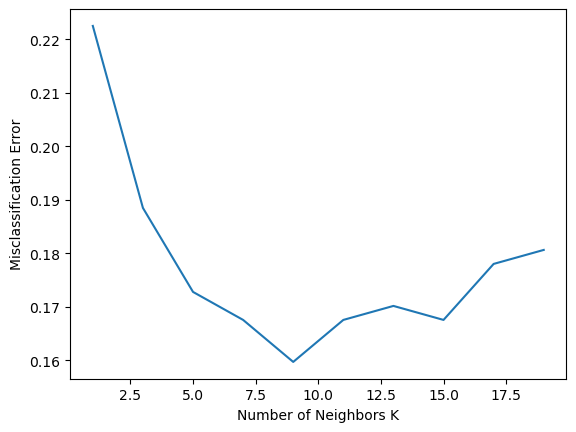

In [59]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()


**K=13 and k=15**

In [60]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=13)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=13)

In [61]:
print("Accuracy of Logistic Regression Model (train): ",KNN_model.score(X_train, y_train))

Accuracy of Logistic Regression Model (train):  0.8381452318460193


In [62]:
print("Accuracy of Logistic Regression Model (test): ",KNN_model.score(X_test, y_test))

Accuracy of Logistic Regression Model (test):  0.8298429319371727


In [63]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train, y_train_predict))

Model Score train data: 0.8381452318460193 

confusion matrix train data:
 [[240 111]
 [ 74 718]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       351
           1       0.87      0.91      0.89       792

    accuracy                           0.84      1143
   macro avg       0.82      0.80      0.80      1143
weighted avg       0.83      0.84      0.84      1143



In [64]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.8298429319371727 

confusion matrix test data:
 [[ 77  34]
 [ 31 240]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.71      0.69      0.70       111
           1       0.88      0.89      0.88       271

    accuracy                           0.83       382
   macro avg       0.79      0.79      0.79       382
weighted avg       0.83      0.83      0.83       382



In [65]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=15)
KNN_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [66]:
print("Accuracy of Logistic Regression Model (train): ",KNN_model.score(X_train, y_train))

Accuracy of Logistic Regression Model (train):  0.8381452318460193


In [67]:
print("Accuracy of Logistic Regression Model (test): ",KNN_model.score(X_test, y_test))

Accuracy of Logistic Regression Model (test):  0.8324607329842932


In [68]:
## Performance Matrix on train data set
y_train_predict = KNN_model.predict(X_train)
model_score = KNN_model.score(X_train, y_train)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train, y_train_predict))

Model Score train data: 0.8381452318460193 

confusion matrix train data:
 [[239 112]
 [ 73 719]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       351
           1       0.87      0.91      0.89       792

    accuracy                           0.84      1143
   macro avg       0.82      0.79      0.80      1143
weighted avg       0.83      0.84      0.84      1143



In [69]:
## Performance Matrix on test data set
y_test_predict = KNN_model.predict(X_test)
model_score = KNN_model.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.8324607329842932 

confusion matrix test data:
 [[ 77  34]
 [ 30 241]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.72      0.69      0.71       111
           1       0.88      0.89      0.88       271

    accuracy                           0.83       382
   macro avg       0.80      0.79      0.79       382
weighted avg       0.83      0.83      0.83       382



### AUC and ROC for the training data

AUC: 0.906


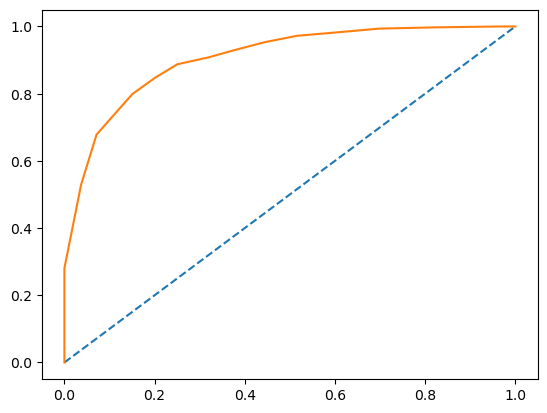

In [70]:
# predict probabilities
probs = KNN_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.906


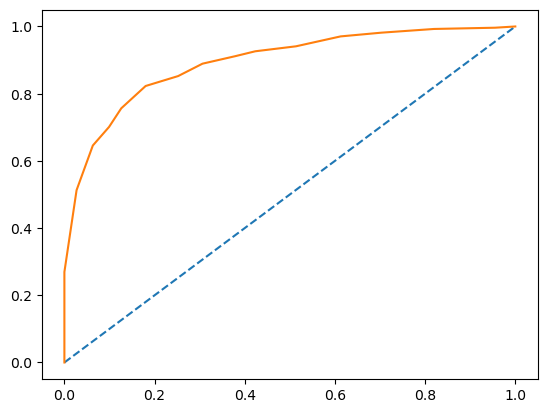

In [71]:
# predict probabilities
probs = KNN_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

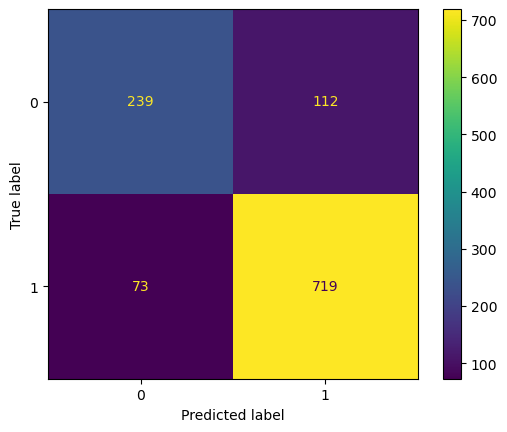

In [72]:
disp = ConfusionMatrixDisplay.from_estimator(KNN_model, X_train, y_train)

# To display the plot
plt.show()

### Confusion Matrix for test data

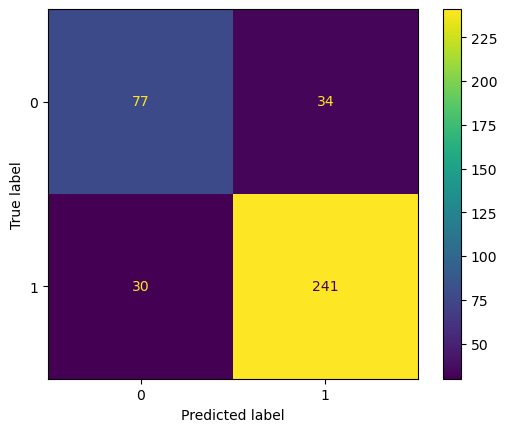

In [73]:
disp = ConfusionMatrixDisplay.from_estimator(KNN_model, X_test, y_test)

# To display the plot
plt.show()

### Naive Bayes Model

In [74]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [75]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [76]:
print("Accuracy of Logistic Regression Model (train): ",NB_model.score(X_train, y_train))

Accuracy of Logistic Regression Model (train):  0.8320209973753281


In [77]:
print("Accuracy of Logistic Regression Model (test): ",NB_model.score(X_test, y_test))

Accuracy of Logistic Regression Model (test):  0.824607329842932


In [78]:
## Performance Matrix on train data set
y_train_predict = NB_model.predict(X_train)
model_score = NB_model.score(X_train, y_train)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train, y_train_predict))

Model Score train data: 0.8320209973753281 

confusion matrix train data:
 [[253  98]
 [ 94 698]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       351
           1       0.88      0.88      0.88       792

    accuracy                           0.83      1143
   macro avg       0.80      0.80      0.80      1143
weighted avg       0.83      0.83      0.83      1143



In [79]:
## Performance Matrix on test data set
y_test_predict = NB_model.predict(X_test)
model_score = NB_model.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.824607329842932 

confusion matrix test data:
 [[ 82  29]
 [ 38 233]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382



### AUC and ROC for the training data

AUC: 0.886


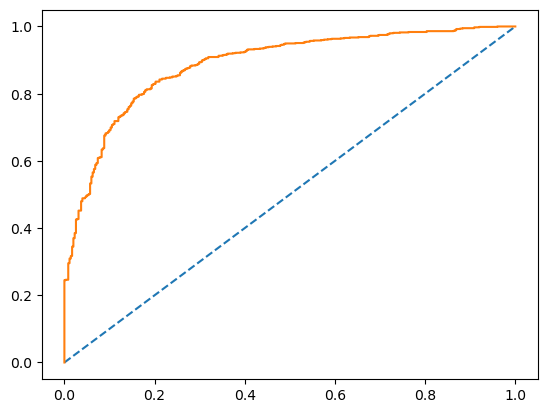

In [80]:
# predict probabilities
probs = NB_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.886


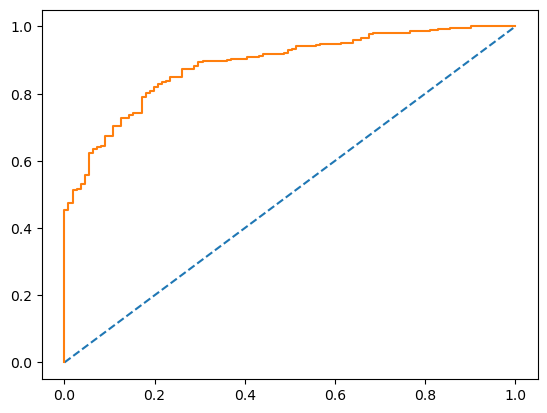

In [81]:
# predict probabilities
probs = NB_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

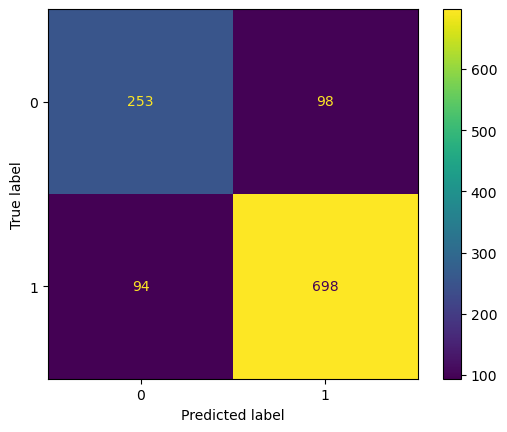

In [82]:
disp = ConfusionMatrixDisplay.from_estimator(NB_model, X_train, y_train)

# To display the plot
plt.show()

### Confusion Matrix for test data

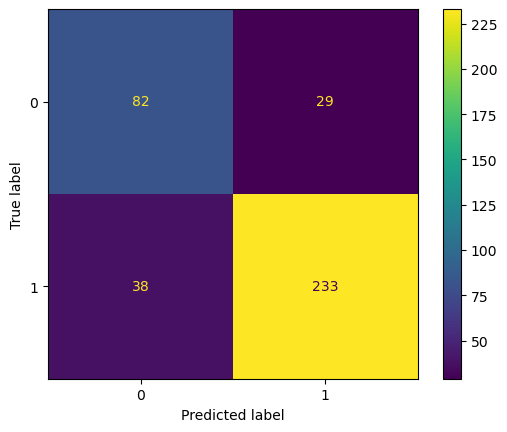

In [83]:
disp = ConfusionMatrixDisplay.from_estimator(NB_model, X_test, y_test)

# To display the plot
plt.show()

### Bagging(Decision tree)

In [84]:
from sklearn import tree
DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [85]:
print("Accuracy of Bagging(decision tree) Model (train): ",DT_model.score(X_train, y_train))

Accuracy of Bagging(decision tree) Model (train):  0.9991251093613298


In [86]:
print("Accuracy of Bagging(decision tree) Model (test): ",DT_model.score(X_test, y_test))

Accuracy of Bagging(decision tree) Model (test):  0.7382198952879581


In [87]:
## Performance Matrix on train data set
y_train_predict = DT_model.predict(X_train)
model_score = DT_model.score(X_train, y_train)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train, y_train_predict))

Model Score train data: 0.9991251093613298 

confusion matrix train data:
 [[351   0]
 [  1 791]]

classification Report train data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143



In [88]:
## Performance Matrix on test data set
y_test_predict = DT_model.predict(X_test)
model_score = DT_model.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.7382198952879581 

confusion matrix test data:
 [[ 67  44]
 [ 56 215]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.54      0.60      0.57       111
           1       0.83      0.79      0.81       271

    accuracy                           0.74       382
   macro avg       0.69      0.70      0.69       382
weighted avg       0.75      0.74      0.74       382



### AUC and ROC for the training data

AUC: 1.000


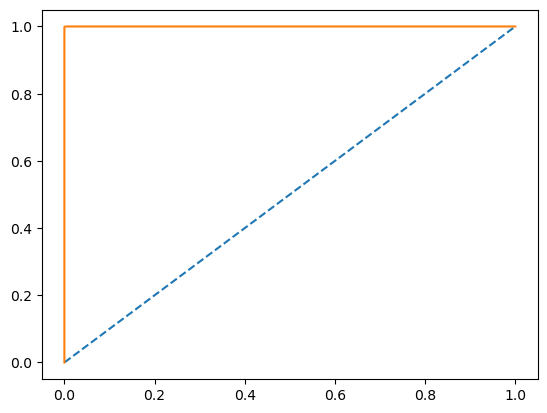

In [89]:
# predict probabilities
probs = DT_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 1.000


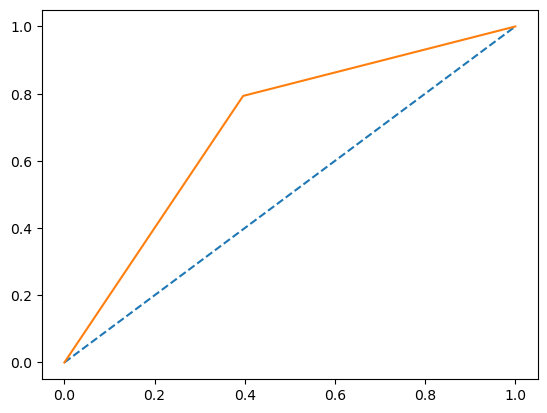

In [90]:
# predict probabilities
probs = DT_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

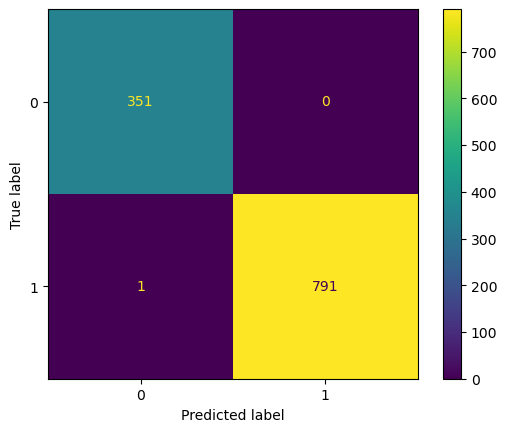

In [91]:
disp = ConfusionMatrixDisplay.from_estimator(DT_model, X_train, y_train)

# To display the plot
plt.show()

### Confusion Matrix for test data

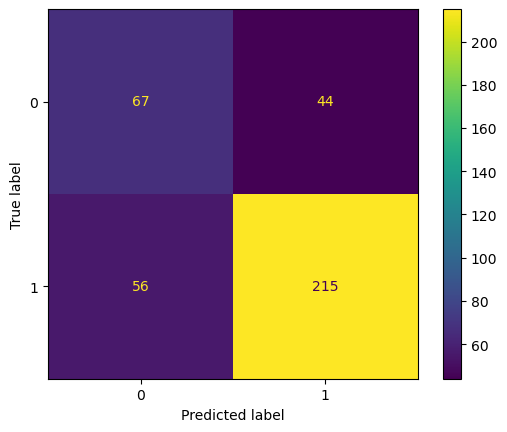

In [92]:
disp = ConfusionMatrixDisplay.from_estimator(DT_model, X_test, y_test)

# To display the plot
plt.show()

### Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [95]:
print("Accuracy of Random Forest Model (train): ",RF_model.score(X_train, y_train))

Accuracy of Random Forest Model (train):  0.9991251093613298


In [96]:
print("Accuracy of Random Forest) Model (test): ",RF_model.score(X_test, y_test))

Accuracy of Random Forest) Model (test):  0.819371727748691


In [97]:
## Performance Matrix on train data set
y_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train, y_train_predict))

Model Score train data: 0.9991251093613298 

confusion matrix train data:
 [[350   1]
 [  0 792]]

classification Report train data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143



In [98]:
## Performance Matrix on test data set
y_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.819371727748691 

confusion matrix test data:
 [[ 77  34]
 [ 35 236]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       111
           1       0.87      0.87      0.87       271

    accuracy                           0.82       382
   macro avg       0.78      0.78      0.78       382
weighted avg       0.82      0.82      0.82       382



### AUC and ROC for the training data

AUC: 1.000


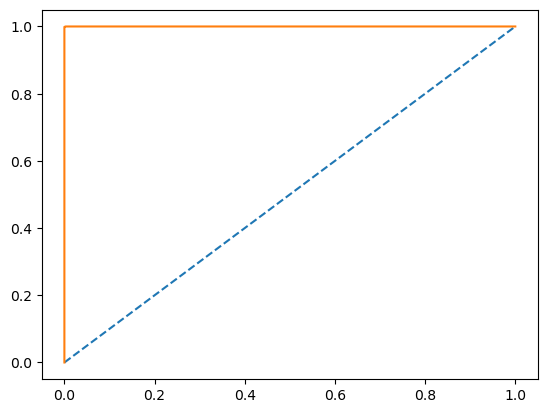

In [99]:
# predict probabilities
probs = RF_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 1.000


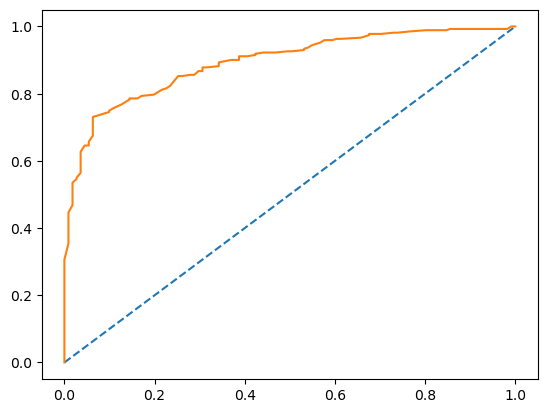

In [100]:
# predict probabilities
probs = RF_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

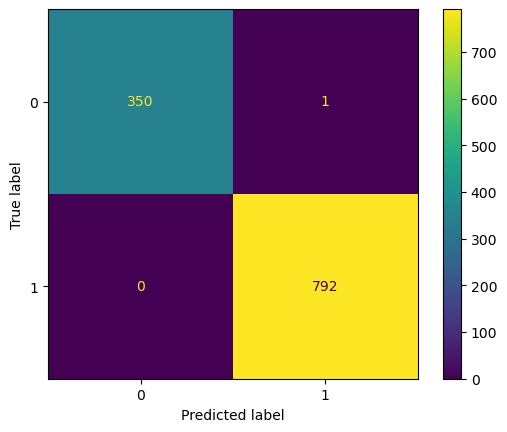

In [101]:
disp = ConfusionMatrixDisplay.from_estimator(RF_model, X_train, y_train)

# To display the plot
plt.show()

### Confusion Matrix for test data

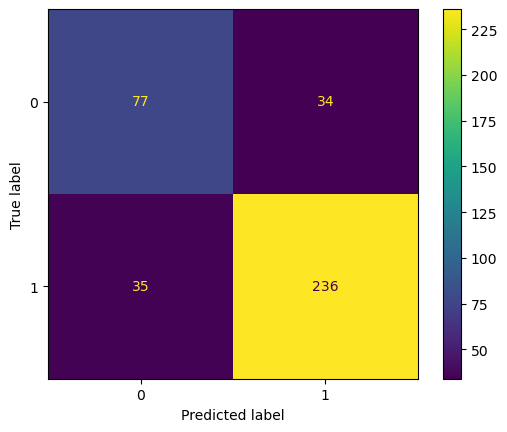

In [102]:
disp = ConfusionMatrixDisplay.from_estimator(RF_model, X_test, y_test)

# To display the plot
plt.show()

### Gradient Boosting

In [103]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(random_state=1)
gbcl = gbcl.fit(X_train, y_train)

In [104]:
print("Accuracy of Gradient Boosting Model (train): ",gbcl.score(X_train, y_train))

Accuracy of Gradient Boosting Model (train):  0.8871391076115486


In [105]:
print("Accuracy of Gradient Boosting Model (test): ",gbcl.score(X_test, y_test))

Accuracy of Gradient Boosting Model (test):  0.8298429319371727


In [106]:
## Performance Matrix on train data set
y_train_predict = gbcl.predict(X_train)
model_score = gbcl.score(X_train, y_train)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train, y_train_predict))

Model Score train data: 0.8871391076115486 

confusion matrix train data:
 [[273  78]
 [ 51 741]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       351
           1       0.90      0.94      0.92       792

    accuracy                           0.89      1143
   macro avg       0.87      0.86      0.86      1143
weighted avg       0.89      0.89      0.89      1143



In [107]:
## Performance Matrix on test data set
y_test_predict = gbcl.predict(X_test)
model_score = gbcl.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.8298429319371727 

confusion matrix test data:
 [[ 81  30]
 [ 35 236]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       111
           1       0.89      0.87      0.88       271

    accuracy                           0.83       382
   macro avg       0.79      0.80      0.80       382
weighted avg       0.83      0.83      0.83       382



### AUC and ROC for the training data

AUC: 0.949


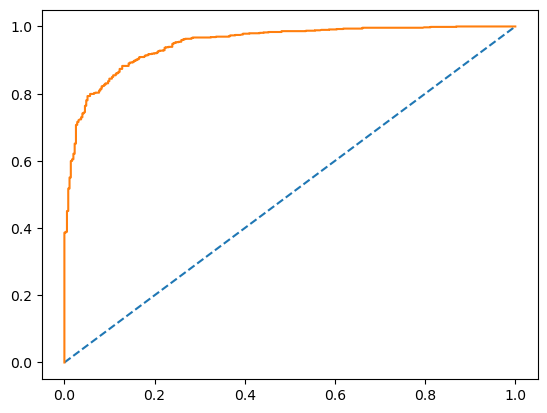

In [108]:
# predict probabilities
probs = gbcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.949


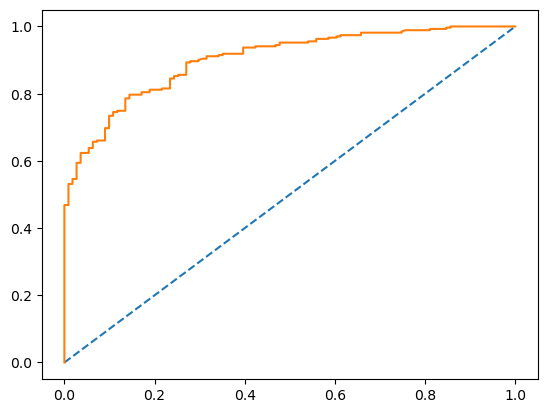

In [109]:
# predict probabilities
probs = gbcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

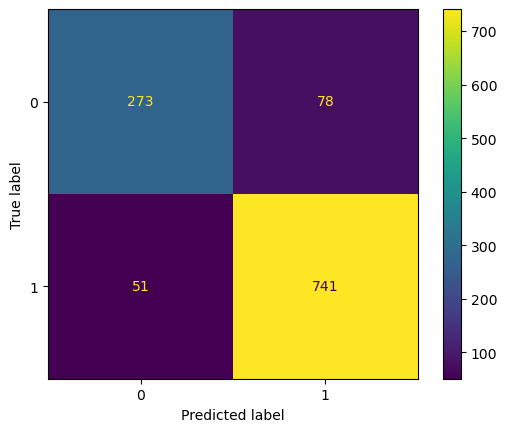

In [110]:
disp = ConfusionMatrixDisplay.from_estimator(gbcl, X_train, y_train)

# To display the plot
plt.show()

### Confusion Matrix for test data

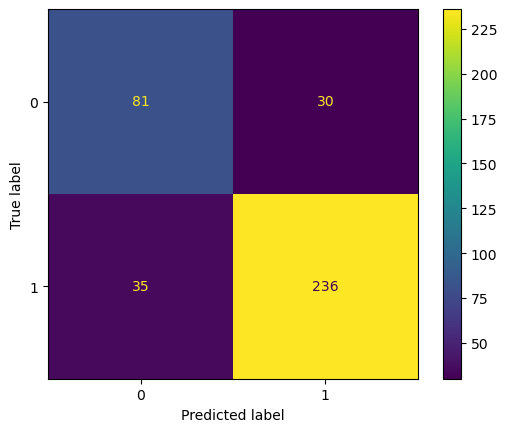

In [111]:
disp = ConfusionMatrixDisplay.from_estimator(gbcl, X_test, y_test)

# To display the plot
plt.show()

## Comparison of Different Models

**Logistic Regression Model**:

Model Score train data: 0.8398950131233596 

confusion matrix train data:

 [[238 113]
 
 [ 70 722]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       351
           1       0.86      0.91      0.89       792

    accuracy                           0.84      1143
   macro avg       0.82      0.79      0.80      1143
weighted avg       0.84      0.84      0.84      1143

Model Score test data: 0.819371727748691 

confusion matrix test data:

 [[ 74  37]
 
 [ 32 239]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.70      0.67      0.68       111
           1       0.87      0.88      0.87       271

    accuracy                           0.82       382
   macro avg       0.78      0.77      0.78       382
weighted avg       0.82      0.82      0.82       382

AUC: 0.889 (Train Data)
AUC: 0.889(test data)

recall value for Class 1:

Training Data: 0.91
Test Data: 0.88

The model has a harder time correctly identifying Class 0(Conservative votes), resulting in more mistakes when predicting it, and lower accuracy in its predictions.

On the other hand, the model is much better at correctly identifying Class 1, with higher accuracy and fewer mistakes. This means the model is strong at detecting Labour Votes.

**KNN Model**: *(k=15)*

Model Score train data: 0.8381452318460193 

confusion matrix train data:

 [[239 112]

 [ 73 719]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.77      0.68      0.72       351
           1       0.87      0.91      0.89       792

    accuracy                           0.84      1143
   macro avg       0.82      0.79      0.80      1143
weighted avg       0.83      0.84      0.84      1143

Model Score test data: 0.8324607329842932 

confusion matrix test data:

 [[ 77  34]

 [ 30 241]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.72      0.69      0.71       111
           1       0.88      0.89      0.88       271

    accuracy                           0.83       382
   macro avg       0.80      0.79      0.79       382
weighted avg       0.83      0.83      0.83       382

AUC: 0.906 (Train data)
AUC: 0.906 (Test data)

Recall for Class 1 is 0.91 for the training data and 0.89 for the test data, indicating that the model is highly effective at correctly identifying Labour Votes.

The model shows a drop in performance when predicting Class 0(Conservative Votes) but performs excellently for Class 1, with high precision, recall, and F1-scores. The AUC values confirm the model's ability to effectively distinguish between the two classes.

**Naives Bayes Model:**

Model Score train data: 0.8320209973753281 

confusion matrix train data:

 [[253  98]

 [ 94 698]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.72       351
           1       0.88      0.88      0.88       792

    accuracy                           0.83      1143
   macro avg       0.80      0.80      0.80      1143
weighted avg       0.83      0.83      0.83      1143

Model Score test data: 0.824607329842932 

confusion matrix test data:

 [[ 82  29]

 [ 38 233]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.68      0.74      0.71       111
           1       0.89      0.86      0.87       271

    accuracy                           0.82       382
   macro avg       0.79      0.80      0.79       382
weighted avg       0.83      0.82      0.83       382

AUC: 0.886(Train)
AUC: 0.886 (Test)

The Naive Bayes model is fairly good at predicting Class 0(Conservative Votes), but it shows a drop in precision and recall on new data.

The model is very effective at predicting Class 1(Labour Votes), performing well on both training and test data.

The model has excellent performance in distinguishing between the classes, as indicated by the high AUC scores.

**Bagging:**


Model Score train data: 0.9991251093613298 

confusion matrix train data:

 [[351   0]

 [  1 791]]

classification Report train data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143

Model Score test data: 0.7460732984293194 

confusion matrix test data:

 [[ 68  43]

 [ 54 217]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.56      0.61      0.58       111
           1       0.83      0.80      0.82       271

    accuracy                           0.75       382
   macro avg       0.70      0.71      0.70       382
weighted avg       0.75      0.75      0.75       382

AUC: 1.000(Test Data)

AUC: 1.000(Train Data)

The Bagging model is highly accurate on the training data but exhibits overfitting, as shown by its much lower performance on the test data. It perfectly classifies training instances but has difficulty with new, unseen data for Class 0(Conservative Votes). Adjustments or further tuning might be necessary to improve its generalization ability and performance on the test data.

**Random Forest**:

Model Score train data: 0.9991251093613298 

confusion matrix train data:

 [[350   1]
 
 [  0 792]]

classification Report train data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1143
   macro avg       1.00      1.00      1.00      1143
weighted avg       1.00      1.00      1.00      1143

Model Score test data: 0.819371727748691 

confusion matrix test data:

 [[ 77  34]
 
 [ 35 236]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.69      0.69      0.69       111
           1       0.87      0.87      0.87       271

    accuracy                           0.82       382
   macro avg       0.78      0.78      0.78       382
weighted avg       0.82      0.82      0.82       382

AUC: 1.000(Test data)

AUC: 1.000(Train data)

The Random Forest model shows impressive performance on the training data but suffers from overfitting, as evidenced by its reduced accuracy on the test data. It correctly identifies Labour Votes (Class 1) but struggles with Conservative Votes (Class 0) when applied to new data. Adjustments or further tuning may be needed to improve its generalization and balance performance across both classes.

**Gradient Boosting**:

Model Score train data: 0.8871391076115486 

confusion matrix train data:

 [[273  78]

 [ 51 741]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.84      0.78      0.81       351
           1       0.90      0.94      0.92       792

    accuracy                           0.89      1143
   macro avg       0.87      0.86      0.86      1143
weighted avg       0.89      0.89      0.89      1143

Model Score test data: 0.8298429319371727 

confusion matrix test data:

 [[ 81  30]

 [ 35 236]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.70      0.73      0.71       111
           1       0.89      0.87      0.88       271

    accuracy                           0.83       382
   macro avg       0.79      0.80      0.80       382
weighted avg       0.83      0.83      0.83       382

AUC: 0.949
AUC: 0.949

The model’s performance on new data is slightly reduced but remains strong overall. It effectively identifies Labour Votes (Class 1) and Conservative Votes (Class 0) with a reasonable level of accuracy.

Naive Bayes: Consistently good performance, especially for Labour Votes. Slightly weaker for Conservative votes but still effective.

Random Forest: Excellent performance on training data but overfits, resulting in lower test data accuracy, particularly for Conservative Votes. Still performs well for Labour Votes.

Gradient Boosting: Strong performance across both training and test data, with high accuracy and effective class separation. Handles Labour Votes very well and performs reasonably for Conservative Votes.

### Model Performance improvement

## SMOTE 

In [112]:
from imblearn.over_sampling import SMOTE

**SMOTE is only applied on the train data set**

In [113]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [114]:
## Let's check the shape after SMOTE
X_train_res.shape


(1584, 8)

### Bagging(Decision tree)

In [142]:
from sklearn import tree
DT_model_SM= tree.DecisionTreeClassifier()
DT_model_SM.fit(X_train_res, y_train_res)

DecisionTreeClassifier()

In [143]:
print("Accuracy of Bagging(decision tree) Model (train): ",DT_model_SM.score(X_train_res, y_train_res))

Accuracy of Bagging(decision tree) Model (train):  0.9993686868686869


In [144]:
print("Accuracy of Bagging(decision tree) Model (test): ",DT_model_SM.score(X_test, y_test))

Accuracy of Bagging(decision tree) Model (test):  0.7617801047120419


In [145]:
## Performance Matrix on train data set
y_train_predict = DT_model_SM.predict(X_train_res)
model_score = DT_model_SM.score(X_train_res, y_train_res)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train_res, y_train_predict))

Model Score train data: 0.9993686868686869 

confusion matrix train data:
 [[792   0]
 [  1 791]]

classification Report train data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       792
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1584
   macro avg       1.00      1.00      1.00      1584
weighted avg       1.00      1.00      1.00      1584



In [146]:
## Performance Matrix on test data set
y_test_predict = DT_model_SM.predict(X_test)
model_score = DT_model_SM.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.7617801047120419 

confusion matrix test data:
 [[ 70  41]
 [ 50 221]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.61       111
           1       0.84      0.82      0.83       271

    accuracy                           0.76       382
   macro avg       0.71      0.72      0.72       382
weighted avg       0.77      0.76      0.76       382



### AUC and ROC for the training data

AUC: 1.000


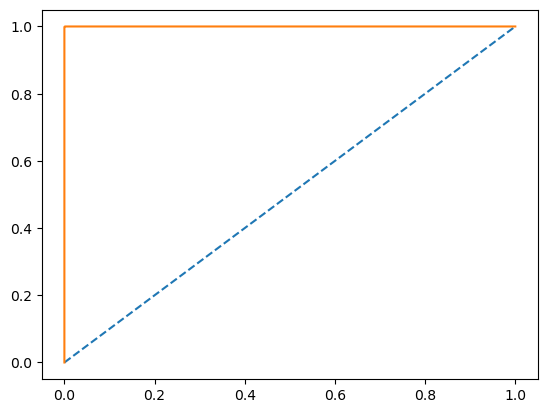

In [147]:
# predict probabilities
probs = DT_model_SM.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 1.000


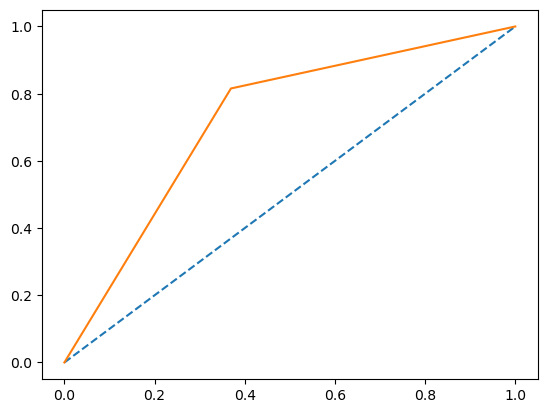

In [148]:
# predict probabilities
probs = DT_model_SM.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

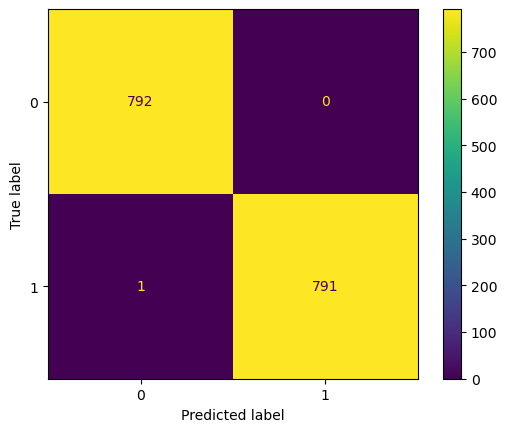

In [149]:
disp = ConfusionMatrixDisplay.from_estimator(DT_model_SM, X_train_res, y_train_res)

# To display the plot
plt.show()

### Confusion Matrix for test data

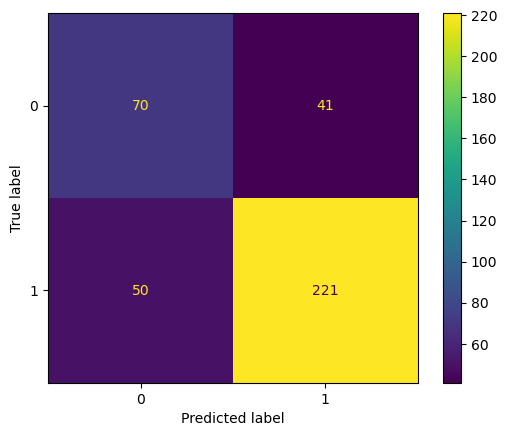

In [150]:
disp = ConfusionMatrixDisplay.from_estimator(DT_model_SM, X_test, y_test)

# To display the plot
plt.show()

### Gradient Boosting

In [152]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl_SM = GradientBoostingClassifier(random_state=1)
gbcl_SM = gbcl_SM.fit(X_train_res, y_train_res)

In [153]:
print("Accuracy of Gradient Boosting Model (train): ",gbcl_SM.score(X_train_res, y_train_res))

Accuracy of Gradient Boosting Model (train):  0.9065656565656566


In [154]:
print("Accuracy of Gradient Boosting Model (test): ",gbcl_SM.score(X_test, y_test))

Accuracy of Gradient Boosting Model (test):  0.8167539267015707


In [155]:
## Performance Matrix on train data set
y_train_predict = gbcl_SM.predict(X_train_res)
model_score = gbcl_SM.score(X_train_res, y_train_res)
print("Model Score train data:",model_score,'\n')
print("confusion matrix train data:\n",metrics.confusion_matrix(y_train_res, y_train_predict))
print("\nclassification Report train data: \n",metrics.classification_report(y_train_res, y_train_predict))

Model Score train data: 0.9065656565656566 

confusion matrix train data:
 [[728  64]
 [ 84 708]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       792
           1       0.92      0.89      0.91       792

    accuracy                           0.91      1584
   macro avg       0.91      0.91      0.91      1584
weighted avg       0.91      0.91      0.91      1584



In [156]:
## Performance Matrix on test data set
y_test_predict = gbcl_SM.predict(X_test)
model_score = gbcl_SM.score(X_test, y_test)
print("Model Score test data:",model_score,'\n')
print("confusion matrix test data:\n",metrics.confusion_matrix(y_test, y_test_predict))
print("\nclassification Report test data: \n",metrics.classification_report(y_test, y_test_predict))

Model Score test data: 0.8167539267015707 

confusion matrix test data:
 [[ 88  23]
 [ 47 224]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.65      0.79      0.72       111
           1       0.91      0.83      0.86       271

    accuracy                           0.82       382
   macro avg       0.78      0.81      0.79       382
weighted avg       0.83      0.82      0.82       382



### AUC and ROC for the training data

AUC: 0.970


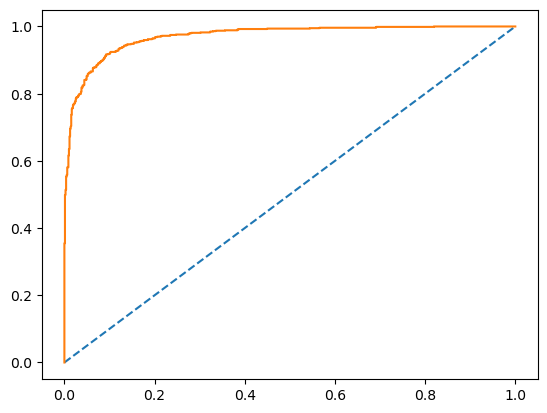

In [157]:
# predict probabilities
probs = gbcl_SM.predict_proba(X_train_res)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train_res, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train_res, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

### AUC and ROC for the test data

AUC: 0.970


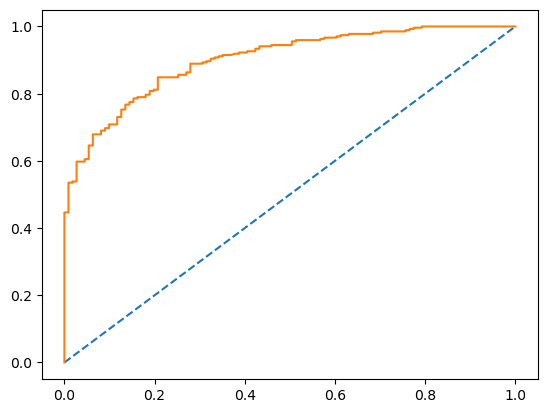

In [158]:
# predict probabilities
probs = gbcl_SM.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

#### Confusion Matrix for the training data

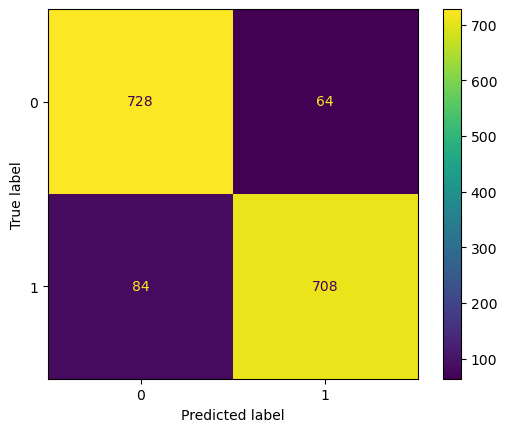

In [159]:
disp = ConfusionMatrixDisplay.from_estimator(gbcl_SM, X_train_res, y_train_res)

# To display the plot
plt.show()

### Confusion Matrix for test data

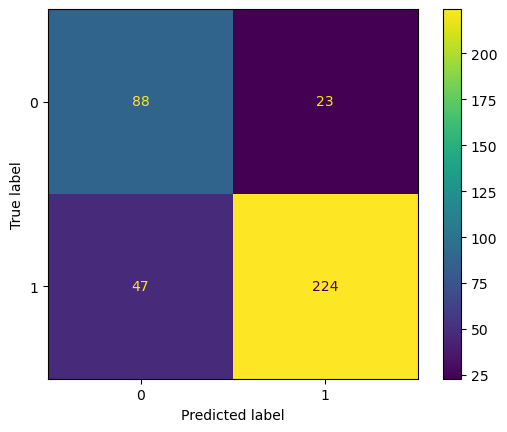

In [160]:
disp = ConfusionMatrixDisplay.from_estimator(gbcl_SM, X_test, y_test)

# To display the plot
plt.show()

## Conclusion after SMOTE

#### **Bagging(Decision tree)**

Accuracy of Bagging(decision tree) Model (train):  99.93%
Accuracy of Bagging(decision tree) Model (test):  77%

Model Score train data: 0.9993686868686869 

confusion matrix train data:

 [[792   0]

 [  1 791]]

classification Report train data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       792
           1       1.00      1.00      1.00       792

    accuracy                           1.00      1584
   macro avg       1.00      1.00      1.00      1584
weighted avg       1.00      1.00      1.00      1584


Model Score test data: 0.7617801047120419 

confusion matrix test data:

 [[ 70  41]
 
 [ 50 221]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.58      0.63      0.61       111
           1       0.84      0.82      0.83       271

    accuracy                           0.76       382
   macro avg       0.71      0.72      0.72       382
weighted avg       0.77      0.76      0.76       382


AUC: 1.000 (Train data)

AUC: 1.000 (Test data)

**The model's performance on the training data remained exceptional, with nearly perfect metrics, regardless of whether SMOTE was applied. This outcome aligns with our expectations, as SMOTE is designed to balance class distributions in the training set, which did not notably alter the already high training performance.**

**Applying SMOTE led to a modest improvement in the model’s performance on the test data. Specifically, there was a noticeable enhancement in precision and F1-score for the Conservative votes (class 0). This improvement indicates that SMOTE has enabled the model to better identify and classify the Conservative votes during testing. The model's ability to recognize the Labour votes (class 1) remained strong, ensuring that overall classification performance was not compromised.**

**Implementing SMOTE has proven beneficial by improving the model's performance on the test set, especially for the Conservative votes. This advancement highlights the model’s enhanced generalization capabilities and better balance in handling both classes. As a result, SMOTE has helped the model achieve superior overall classification performance, providing a more reliable and effective solution.**

#### **Boosting(Decision tree)**

Accuracy of Gradient Boosting Model (train):  91

Accuracy of Gradient Boosting Model (test): 82

Model Score train data: 0.9065656565656566 

confusion matrix train data:

 [[728  64]

 [ 84 708]]

classification Report train data: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       792
           1       0.92      0.89      0.91       792

    accuracy                           0.91      1584
   macro avg       0.91      0.91      0.91      1584
weighted avg       0.91      0.91      0.91      1584

Model Score test data: 0.8167539267015707 

confusion matrix test data:

 [[ 88  23]

 [ 47 224]]

classification Report test data: 
               precision    recall  f1-score   support

           0       0.65      0.79      0.72       111
           1       0.91      0.83      0.86       271

    accuracy                           0.82       382
   macro avg       0.78      0.81      0.79       382
weighted avg       0.83      0.82      0.82       382

AUC: 0.970 (Train data)
AUC: 0.970 (Test data)

**With SMOTE applied, the Boosting model shows improved metrics compared to its performance before SMOTE. Accuracy, precision, recall, F1-score, and AUC have all increased, indicating a well-balanced model that effectively learns from both conservative votes (class 0) and labour votes (class 1) .**

**The increase in AUC signifies better overall class separation, demonstrating that SMOTE has enhanced the model’s ability to distinguish between conservative votes and labour votes.**

**Although the overall accuracy on the test data is slightly lower compared to the pre-SMOTE model, SMOTE has improved the precision and recall for conservative votes (class 0). The higher AUC indicates that the model now better handles the class 0 (conservative votes) and shows improved generalization.**

**The precision and recall for conservative votes have improved, suggesting that SMOTE has helped the model better classify these votes while still maintaining strong performance for labour votes.**

**Bagging shows near-perfect metrics both before and after SMOTE. It achieves the highest accuracy and maintains perfect AUC scores.**

**Boosting with SMOTE demonstrates slightly better accuracy and F1-scores on the test data compared to Bagging. It also shows improved balance in class performance, particularly for conservative votes.**

 ### Comparing all the model built so far:

**Logistic Regression** performs reasonably well but shows a slight decline in performance on the test data. The AUC remains constant, indicating consistent performance in distinguishing between classes.

**KNN** also shows strong performance, with a slightly higher AUC compared to Logistic Regression, but similar F1-scores. It manages to maintain good performance across training and test datasets.

**Naive Bayes** offers competitive performance, particularly for Class 1 (labour votes), but its overall accuracy and AUC are slightly lower than KNN and Logistic Regression.

**Bagging** performs perfectly on training data, but shows a significant drop in performance on test data, especially in classifying conservative votes. The perfect AUC on test data is somewhat misleading due to the high accuracy on training data.

**Random Forest** shows similar issues as Bagging, with perfect performance on the training data but reduced performance on the test data, especially in classifying conservative votes.

**Gradient Boosting** offers strong performance with high F1-scores and AUC, although there is a minor decline on test data. It balances performance across both classes and maintains a high level of accuracy and AUC.

**Bagging (Decision Tree)** After **SMOTE** demonstrates near-perfect performance on training data but a drop on test data, especially for conservative votes. The perfect AUC is indicative of the model’s ability to separate classes well, but the test performance issues are a concern.

**Boosting (Decision Tree)** After **SMOTE** provides a balanced performance with good accuracy, F1-scores, and AUC on both training and test data. It handles class imbalance effectively, showing the best balance between precision, recall, and F1-scores for both classes.

**Best Model Selection:**

**Gradient Boosting (Pre-SMOTE)**: It shows strong performance with high F1-scores and AUC on both training and test data. It effectively handles class imbalance and generalizes well, though there is a slight decrease in accuracy on test data.

**Boosting (Decision Tree) After SMOTE**: This model maintains a high level of accuracy and F1-scores for both classes and performs very well in handling class imbalance. The high AUC values indicate excellent class separation and overall performance.

**Final Model: Boosting (Decision Tree) After SMOTE** due to its balanced performance across both classes, effective handling of class imbalance, and strong generalization ability. It achieves a good balance between precision and recall for both conservative and labour votes, and its performance metrics remain robust after applying SMOTE.

### Important features in the final model and draw inferences.

In [161]:
import matplotlib.colors as mcolors

In [162]:
df_encoded

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender_male,vote_Labour
0,0.275362,0.428571,0.428571,0.75,0.00,0.1,0.666667,0,1
1,0.173913,0.714286,0.714286,0.75,0.75,0.4,0.666667,1,1
2,0.159420,0.714286,0.714286,1.00,0.25,0.2,0.666667,1,1
3,0.000000,0.714286,0.142857,0.25,0.00,0.3,0.000000,0,1
4,0.246377,0.142857,0.142857,0.00,0.00,0.5,0.666667,1,1
...,...,...,...,...,...,...,...,...,...
1520,0.623188,1.000000,0.428571,0.25,0.75,1.0,1.000000,1,0
1521,0.710145,0.142857,0.142857,0.75,0.75,0.7,0.666667,1,0
1522,0.188406,0.428571,0.428571,1.00,0.75,0.1,0.666667,1,1
1523,0.536232,0.428571,0.428571,0.00,0.75,1.0,0.666667,1,0


Feature: 0, Score: 0.06097
Feature: 1, Score: 0.08405
Feature: 2, Score: 0.02374
Feature: 3, Score: 0.21314
Feature: 4, Score: 0.33675
Feature: 5, Score: 0.19165
Feature: 6, Score: 0.08731
Feature: 7, Score: 0.00238


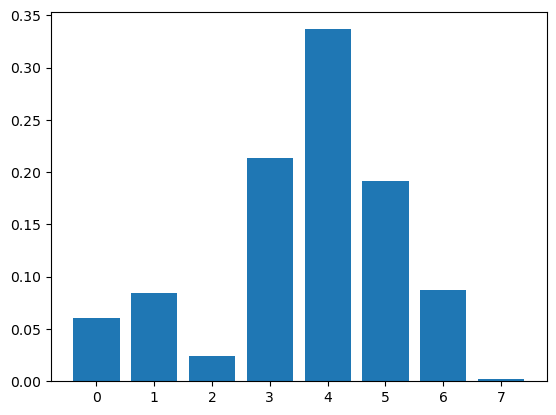

In [163]:
import matplotlib.pyplot as plt

# Assuming best_grid_bag is your tuned Bagging Classifier
importance = gbcl_SM.feature_importances_

# Summarize feature importance
for i, v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i, v))

# Plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Feature 4 - Hague (Score: 0.33675): This feature has the highest importance score. It means this feature has the most influence on the model's predictions. Consider focusing on understanding and leveraging this feature for more insights or strategies.

Feature 3 - Blair (Score: 0.21314): This is also a significant feature in your model. It plays a substantial role in prediction outcomes, so it’s important for the analysis.

Feature 5 - Europe (Score: 0.21314): This is also a significant feature in your model. It plays a substantial role in prediction outcomes, so it’s important for the analysis.

Hague,Blair and Europe should be our focus areas. These features significantly impact your model’s predictions, so it’s worth investigating them further.

Gender, with its minimal importance, may be less relevant. we can consider removing it from the model to simplify and possibly improve performance. However, ensure that its removal does not overlook any subtle nuances that might be relevant.